In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
dev_df = pd.read_csv('train.csv')
del dev_df["Id"]
dev_df = dev_df.drop_duplicates().copy()
dev_df["Prediction"] = dev_df["Prediction"].apply(lambda x: 1 if x == "s" else 0)

train_df, val_df = train_test_split(dev_df, test_size=0.2, stratify=dev_df["Prediction"])
train_df, val_df = train_df.reset_index(drop=True).copy(), val_df.reset_index(drop=True).copy()

test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,0,81.321,16.490,32.263,292.955,1.487,432.863,0.368,0.610,51.301,...,0.451,682.299,3,350.477,-1.703,-2.694,89.351,-0.216,-0.426,516.886
1,1,88.956,68.582,63.717,31.012,-999.000,-999.000,-999.000,2.873,24.555,...,-1.652,187.097,1,37.783,3.337,0.198,-999.000,-999.000,-999.000,37.783
2,1,146.677,36.656,90.538,43.040,-999.000,-999.000,-999.000,3.065,33.458,...,-1.898,230.985,1,64.921,-1.162,1.085,-999.000,-999.000,-999.000,64.921
3,0,261.883,79.103,173.935,274.358,2.475,535.769,0.974,1.869,33.094,...,2.856,523.775,3,174.813,-0.345,-0.927,153.639,-2.821,-0.119,366.078
4,1,143.689,10.911,97.488,0.813,-999.000,-999.000,-999.000,3.124,0.813,...,1.214,73.286,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000


In [4]:
train_df.describe()

,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.342670,-48.731408,49.217542,81.192486,57.940969,-708.208378,-601.360661,-709.141104,2.372090,18.935244,...,-0.010099,209.843163,0.979870,-347.907700,-398.859893,-398.864508,-692.161550,-708.909208,-708.906184,73.093581
std,0.474603,406.226838,35.346232,40.799009,63.628546,454.577777,657.153189,453.122828,0.782942,22.474311,...,1.811706,126.414899,0.977476,532.860231,489.255339,489.251640,479.971291,453.482567,453.487031,97.963812
min,0.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,-3.142000,17.931000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,0.000000,78.162000,19.206000,59.397000,14.196750,-999.000000,-999.000000,-999.000000,1.809000,2.834000,...,-1.576000,122.995000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,0.000000,105.082000,46.523000,73.771000,38.548500,-999.000000,-999.000000,-999.000000,2.491000,12.329500,...,-0.025000,179.856000,1.000000,38.980500,-1.875500,-2.092000,-999.000000,-999.000000,-999.000000,40.561000
75%,1.000000,130.714000,73.573250,92.287250,79.311000,0.491000,83.489000,-4.566750,2.961000,27.610250,...,1.561000,263.557750,2.000000,75.363250,0.431000,0.502250,33.696250,-2.451000,-2.270000,109.942250
max,1.000000,1192.026000,690.075000,1329.913000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,706.672000,4.500000,3.141000,1633.433000


<AxesSubplot:>

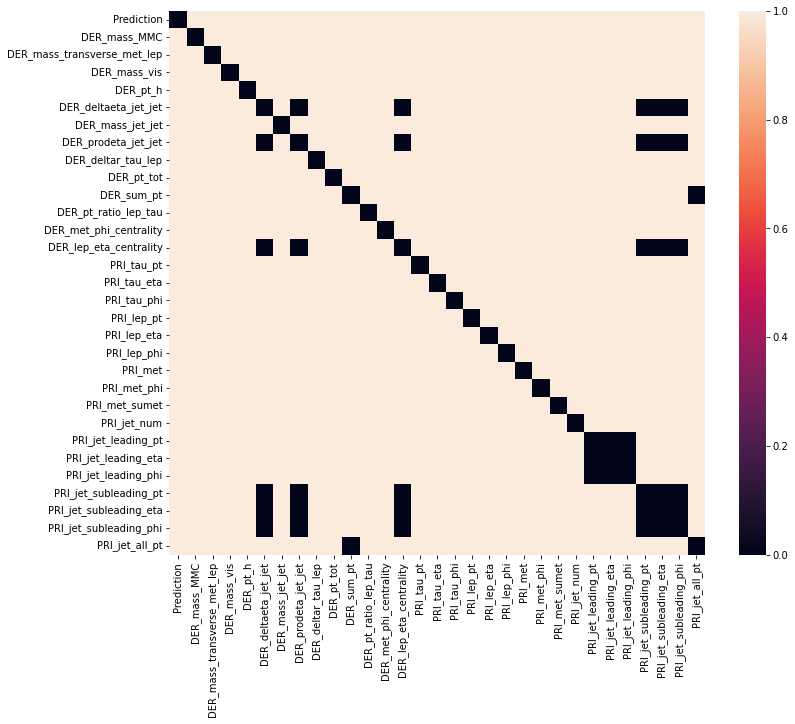

In [5]:
corrMatrix = train_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap((corrMatrix < 0.95) & (-0.95 < corrMatrix))

In [6]:
useless = [
    'DER_deltaeta_jet_jet', 
    'DER_prodeta_jet_jet',
    'DER_lep_eta_centrality', 
    'PRI_jet_subleading_eta',
    'PRI_jet_subleading_phi', 
    'PRI_jet_leading_eta', 
    'PRI_jet_leading_phi', 
    'DER_sum_pt', 
]

for col in useless:
    del train_df[col]

<AxesSubplot:>

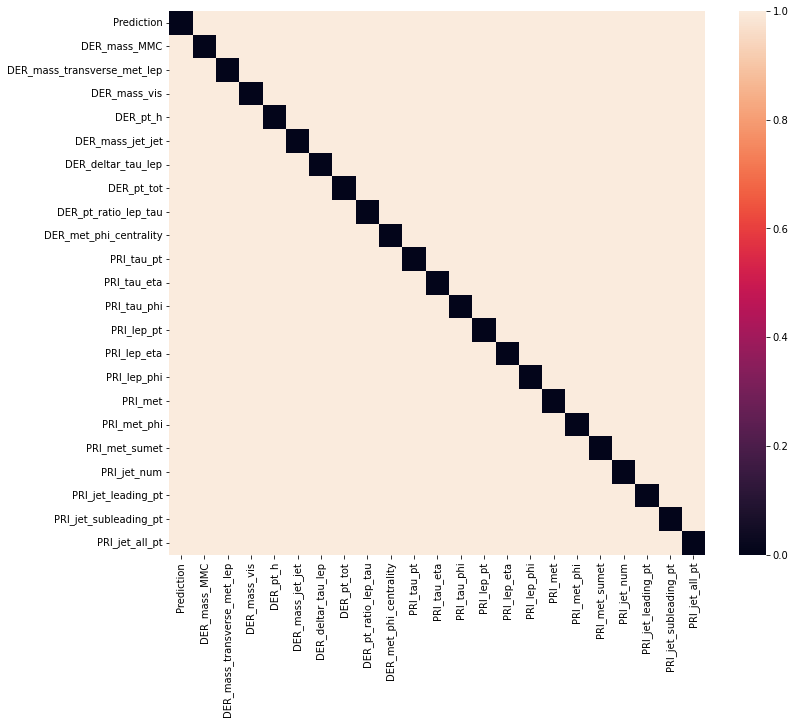

In [7]:
corrMatrix = train_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap((corrMatrix < 0.95) & (-0.95 < corrMatrix))

<AxesSubplot:>

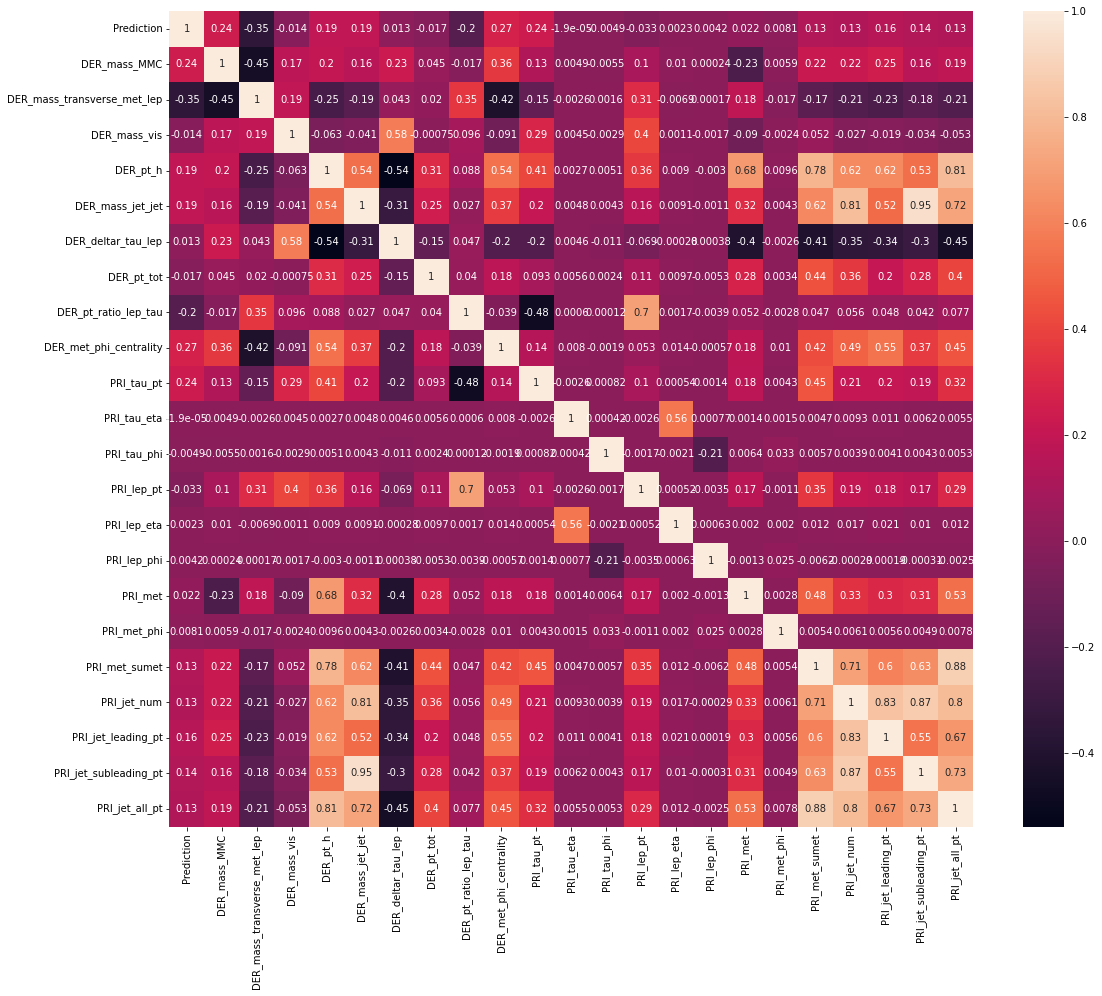

In [8]:
plt.figure(figsize=(18,15))
corrMatrix = train_df.corr()
sns.heatmap(corrMatrix, annot=True)

In [9]:
import numpy as np

In [10]:
train_df[train_df < -999.000] = np.nan
train_df.fillna(train_df.mean(), inplace=True)

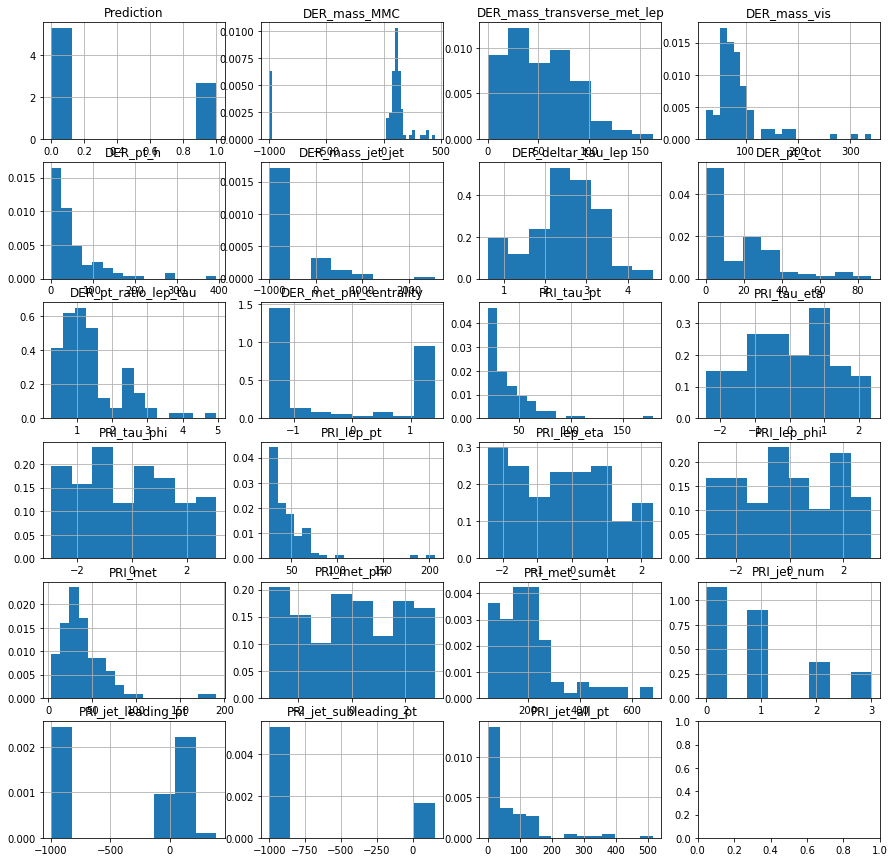

In [11]:
fig, axs = plt.subplots(6, 4, figsize=(15,15))
columns = train_df.columns
for i in range(23):
    train_df.loc[:100, columns[i]].hist(
        bins="auto", 
        density=True, 
        ax=axs[i // 4, i % 4], 
    )
    axs[i // 4, i % 4].set_title(columns[i])